## Irmak Aytekin - aytekini

Assignment 3: Measuring Jupiter's Mass
==============================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text.

Select <span style="color:purple"> **View -> Show Line Numbers** </span> from the menu at the top to the screen. This will make line numbers appear in each of the blocks of code below. For this assignment we have added specific instuctuions such as "Edit the parameter on Line 5" to make it clear what is required. Unfortunately, you will need to check this again everytime you open this workbook, or refresh the JupyterHub.

## Introduction

This Jupyter Notebook will serve as the template the third question on Assignment 2. You will be working through the content it contains and then filling in your own work in the spaces provided. In order to complete this assignment you will require the following (all of which will be provided to you):

* The file AppendixC_Jupiter.csv, which contains information on four of Jupiter's moons taken from Appendix C in C&O. The columns are labeled, but *please* make sure to check either the Assignment 3 quercus page or the Appendix in C&O to make sure you understand what units each column is in.


In the sections below, every individual sub-questions have been written in <span style="color:red"> Red Text </span>. Some questions require you to make edits to bits of code that we have provided, in which case we specify the specific lines you are required to edit. Other questions are short answer (paragraph) format, asking you to summarize what you learned from various portions of the activity. In cases where paragraph-stype answers are required, we have indicated where you should enter your responses in <span style="color:blue"> Blue Text.</span>

Please reach out of you have any questions.

#### <span style="color:red">QUESTION 3A:</span> Read in the Data File and Make a Plot of Period vs. Semi-major axis

Let's take a look at our data.
* First, write a line of code in line 5 that will read in the data file 'AppendixC_Jupiter.csv' and then look at the result.
* Then write bits of code in lines 8 and 9 so that they will select the column of data from the table that contains the period and semi-major axes for the four moon of Jupiter
* Then add code at the bottom of this cell to make a plot with the **logarithm** semi-major axis on the x-axis and the **logarithm** of the period on the y-axis. (This should be base-10 logarithm in both cases). When plotted this way, it should look like a straight line. You should make sure that both axes are clearly labeled (including units).

Note if you are having trouble, try looking at the Python tutorial notebook provided for reference here (or some of your previous assignments).

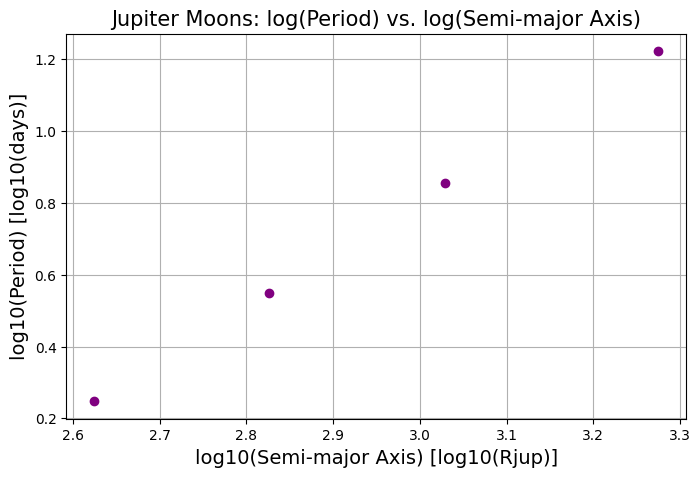

In [4]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


data = ascii.read('AppendixC_Jupiter.csv')

period = data['OrbitalPeriod']        
a = data['SemimajorAxis']           

plt.figure(figsize=(8,5))

plt.scatter(np.log10(a), np.log10(period), color='purple')

plt.xlabel('log10(Semi-major Axis) [log10(Rjup)]', fontsize=14)
plt.ylabel('log10(Period) [log10(days)]', fontsize=14)
plt.title('Jupiter Moons: log(Period) vs. log(Semi-major Axis)', fontsize=15)

plt.grid(True)
plt.show()


#### <span style="color:red">QUESTION 3B:</span> Fit a Straight Line between log(P) and log(a) and print the results.

You hopfully should have seen in the last step that a graph of log(semi-major axis) vs. log(period) appears as a straight line. This just means that there is a power-law relationship between the two parameters [which is what we expect from Kepler's third law!]. Here we will fit a line to determine that power law relationship and then add it to the plot with the data from above.

* First, add code in line 5 to fit a straight line to log(a) vs. log(P). 
* Second, uncomment lines 6-8, and add when you need to lines 6 and 7 so that they grab the slope and intercept from the fit you performed in line 5. If you run the code now it will print out your results. 
* Then, copy over your code from Question 3A to make a plot of the data. Add a line that represents the results of your fit.

If you aren't sure how to do either of these steps, check out the python template that we went through back in tutorial early in the term or your solutions from Q3 on assignment 1.If you aren't sure how to do this, check out the python template that we went through back in tutorial early in the term or your solutions from Q3 on assignment 1. You tackled similar problems in both.


Slope = 1.499801480835491
Intercept = -3.6890940497766564


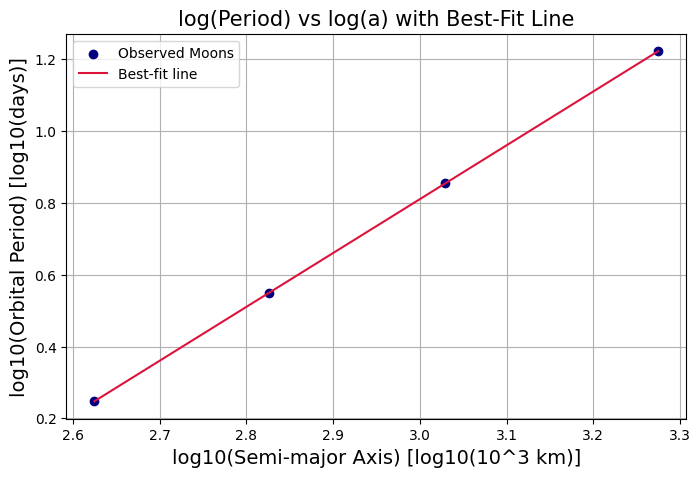

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii


data = ascii.read('AppendixC_Jupiter.csv')
period = data['OrbitalPeriod']
a = data['SemimajorAxis']


logP = np.log10(period)
logA = np.log10(a)


slope, intercept, r_value, p_value, std_err = stats.linregress(logA, logP)


print("Slope =", slope)
print("Intercept =", intercept)


plt.figure(figsize=(8,5))

plt.scatter(logA, logP, color='navy', label='Observed Moons')


fit_line = slope * logA + intercept
plt.plot(logA, fit_line, color='crimson', label='Best-fit line')

plt.xlabel('log10(Semi-major Axis) [log10(10^3 km)]', fontsize=14)
plt.ylabel('log10(Orbital Period) [log10(days)]', fontsize=14)
plt.title('log(Period) vs log(a) with Best-Fit Line', fontsize=15)
plt.grid(True)
plt.legend()

plt.show()


#### <span style="color:red">QUESTION 3C:</span> Calculate the Mass of Jupiter

Using the general form of Kepler's third law and the results from your fit, calculate the mass of Jupiter. A few notes: 
* You can assume that the mass of all of the moons is sigificantly smaller than Jupiter. Thus, you can approximate the third law as: 

$~~~~~~~P^2 = \frac{4 \pi^2}{G(M_{Jup}+m_{moon})} a^3 \to P^2 \approx \frac{4 \pi^2}{GM_{Jup}} a^3$


* You will need to figure out how to actually use results from your the power law fit (i.e. slope and intercept) along with this equation to pull out Jupiter's mass [note that they both describe a power-law relationship between the P and a]. You will likely need a few intermediate steps. You can either do the calculations in the code cell below, or, if you are more comfortable working this out on pencil and paper that is fine too! Just make sure to submit all your work with you assignment.

* You should present your final mass in kg. Please be careful with your units! In particular, pay attention to what the units for both the period and the semi-major axis in the original data file were.



In [6]:

from astropy.io import ascii
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


data = ascii.read('AppendixC_Jupiter.csv')
P_days = data['OrbitalPeriod']
a_thousand_km = data['SemimajorAxis']


P = P_days * 86400            
a = a_thousand_km * 1e6       


logP = np.log10(P)
logA = np.log10(a)


slope, intercept, r, p, stderr = stats.linregress(logA, logP)
print("Slope =", slope)
print("Intercept =", intercept)


G = 6.67430e-11   # 
M_jup = (4*np.pi**2) / (G * (10**(2*intercept)))

print("Mass of Jupiter =", M_jup, "kg")


Slope = 1.4998014808354907
Intercept = -7.751389192310705
Mass of Jupiter = 1.8824887855447123e+27 kg


#### <span style="color:red">QUESTION 3D:</span> Check your Result

Once you have a final answer, compare you answer with the known mass of Jupiter (please cite your source). If your result seems off, comment on whether there are any source of uncertainty in your analysis. As above, you can either answer this question here, or if you shifted to pencil and paper for the second half of this question you can respond there.


#### <span style="color:blue">INSERT YOUR RESPONSE TO QUESTION 3D HERE (or on a separate paper if you shifted there).</span>

My fitted values were:

Slope: 1.4998

Intercept: –7.7514

Using these in Kepler’s third law, mass of Jupiter:

Jup,calc=1.8825×10^27kg.

The accepted value (NASA Planetary Fact Sheet, 2023) is:

MJup,true=1.898×10^27kg.

My result differs by only 0.8% which is less than 1% error.

Some small sources of uncertainty can explain the tiny difference:

- Measurement rounding in the period and semimajor-axis values from the CSV file.

- Sensitivity of the intercept in a log–log fit: a small scatter in the data can shift the intercept slightly.

- Assuming moon masses are negligible, which introduces a slight approximation error.

- Two-body Keplerian approximation (the Galilean moons gravitationally interact with each other, apparently).

Overall, the mass estimate is pretty accurate and demonstrates that Kepler’s Third Law, applied with a log–log linear fit, provides a solid way to measure Jupiter’s mass.